<a href="https://colab.research.google.com/github/lbdkn8/nlp_experiments/blob/main/Lebedkin_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from lxml import etree

In [3]:
from typing import List, Tuple

In [4]:
%pip install spacy-udpipe
%pip install pymorphy2==0.8

import spacy_udpipe
import string, re

spacy_udpipe.download("ru-syntagrus") 
nlp = spacy_udpipe.load("ru-syntagrus")

     |████████████████████████████████| 307kB 5.1MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp36-cp36m-linux_x86_64.whl size=5625268 sha256=3d7ffa5d0bdcdd4b26905e137c3fd644bcccead9e450d59342cfe7b83a4d54a4
  Stored in directory: /root/.cache/pip/wheels/0c/9d/db/6d3404c33da5b7adb6c6972853efb6a27649d3ba15f7e9bebb
Successfully built ufal.udpipe
     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 7.1MB 5.0MB/s 
Downloaded pre-trained UDPipe model for 'ru-syntagrus' language


In [5]:
def chewable(s):                                                # Убираем лишнее 
  lemmas = [token.lemma_ for token in nlp(s)]
  s_lemmd = ' '.join(lemmas)                                                
  webs = '(\S+\.\S+\.?\S+[\s^\v]?)'
  nums = '(\d+[\s^\v]?)'
  re_webs = re.compile(webs)                                    # Убираем сслыки
  re_pnct = re.compile('[%s]' % re.escape(string.punctuation))  # Пунктуацию
  re_nums = re.compile(nums)                                    # Почему-то числа становились наиболее значимыми признаками - убираю
  s_dewebbed = re_webs.sub('', s_lemmd)
  s_stripped = re_pnct.sub('', s_dewebbed)
  s_denummed = re_nums.sub('', s_stripped)
  return s_denummed

In [6]:
def load_sentirueval_2016(file_name: str) -> Tuple[List[str], List[str]]:
    texts = []
    labels = []
    with open(file_name, mode='rb') as fp:
        xml_data = fp.read()
    root = etree.fromstring(xml_data)
    for database in root.getchildren():
        if database.tag == 'database':
            for table in database.getchildren():
                if table.tag != 'table':
                    continue
                new_text = None
                new_label = None
                for column in table.getchildren():
                    if column.get('name') == 'text':
                        new_text = chewable(column.text)
                        if new_label is not None:
                            break
                    elif column.get('name') not in {'id', 'twitid', 'date'}:
                        if new_label is None:
                            label_candidate = str(column.text).strip()
                            if label_candidate in {'0', '1', '-1'}:
                                new_label = 'negative' if label_candidate == '-1' else \
                                    ('positive' if label_candidate == '1' else 'neutral')
                                if new_text is not None:
                                    break
                if (new_text is None) or (new_label is None):
                    raise ValueError('File `{0}` contains some error!'.format(file_name))
                texts.append(new_text)
                labels.append(new_label)
            break
    return texts, labels

In [54]:
fXML = '/content/drive/My Drive/bank_train_2016.xml'

In [55]:
texts, labels = load_sentirueval_2016(fXML)

In [56]:
print('Number of texts is {0}, number of labels is {1}.'.format(len(texts), len(labels)))

Number of texts is 9392, number of labels is 9392.


In [57]:
import random

In [58]:
for idx in random.choices(list(range(len(texts))), k=20):
    print('{0} => {1}'.format(labels[idx], texts[idx]))

neutral => RT tohizecahary  заполнить заявка на кредит в альфа банк расчесть 
neutral => Kyevegni весь схема проходить через Германия банк ЗАО РАЙФФАЙЗЕНБАНК мой личный для строительство и завод в Хорватия
positive => я понравиться видео  новый реклама Сбербанк    на YouTube 
neutral => кредит наличный орел сбербанк 
negative => RT Zgorevna  сразу после приговор падать и индекс ММВБ  и акция Сбербанк  и акция «Газпрома» 
negative => в Москва прийти в Сбербанк сразу подумывать  что начаться митинг 
neutral =>  news Сбербанк приступить к выпуск банковский карта ПРО читать  ruff  seo
neutral => ставка пенсионный кредит в россельхозбанк 
neutral => скачать мобильный приложение сбербанк онлайн для blackberry 
neutral => anitakarnik  вт саранск кредит 
neutral => RT realtyagency  сегодня у мы обзор Альфабанк и он ипотечный программа 
neutral => руководство тувинский филиал россельхозбанка  филиал  россельхозбанка
neutral => мобильный банк сбербанк памяток 
neutral => zaletchikya в Сочи банко

In [59]:
positive_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'positive']
negative_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'negative']

In [60]:
for cur in positive_tweets[:5]: print(cur)

sawikshuster YevhenS главный чтобы банк СБЕР и ВТБ   
самый выгодный автокредит в втб 
легко можно получить денежный кредит ы вт банк
снижение процентный ставка по кредит на недвижимость сбербанк 
в наш сбербанк прийти американец и просить сфоткаться с он у банкомат  D я васто быть в шок и на фотка полюбому получиться смешной xD


In [61]:
for cur in negative_tweets[:5]: print(cur)

ShtirliZ Zhukovaolga winzard tereshenkov обязательно про сбербанк писать  временами хлестко интерать магазин финт выкручивать 
UmkaAlfariusigorsechin втб и сбер точно  вопрос  блокировка операция или запрет на кредит 
Канада ввести санкция против Газпромбанк  ВЭБ  Новатэк и российский оборонный компания
RT letokot  если Сбер и ВТБ попасть под санкция  быть жоп
RT tvru   Канада ввести санкция против оборонный и сырьевой компания и банк РФ  среди они  в частность    Газпромбанк     Внешэк …


In [62]:
import nltk
from nltk import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=word_tokenize)

In [65]:
texts = [texts[i] for i in range(len(texts)) if labels[i] != 'neutral']
labels = [l for l in labels if l != 'neutral']

In [66]:
vectorizer.fit(texts)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7f753e13ed90>,
                vocabulary=None)

In [67]:
print(vectorizer.get_feature_names()[0:20])

['aberadez', 'abunyasha', 'abysov', 'adlarguan', 'admeru', 'adworningju', 'aeroflot', 'agatacrysty', 'airbnb', 'akarpova', 'akselenc', 'akterpnd', 'alekckuzya', 'alekko', 'alekzzzzz', 'alenkamalenkaa', 'alex', 'alexeyenko', 'alexigrey', 'alextofa']


In [83]:
fnids = len(vectorizer.get_feature_names())
print(fnids)

4880


In [84]:
X = vectorizer.transform(texts)

In [85]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [86]:
print(texts[0])

sawikshuster YevhenS главный чтобы банк СБЕР и ВТБ   


In [87]:
print(X[0])

  (0, 595)	1
  (0, 787)	1
  (0, 935)	1
  (0, 1284)	1
  (0, 1403)	1
  (0, 1887)	1
  (0, 3890)	1
  (0, 4737)	1


In [88]:
print(vectorizer.get_feature_names()[fnids - 1000])

санкциом


In [89]:
print(vectorizer.get_feature_names()[fnids - 200])

хуя


In [90]:
print(vectorizer.get_feature_names()[fnids - 3000])

значит


In [91]:
from sklearn.feature_extraction.text import TfidfTransformer

In [92]:
transformer = TfidfTransformer().fit(X)

In [93]:
X_transformed = transformer.transform(X)

In [94]:
print(X_transformed[0])

  (0, 4737)	0.3507418062026665
  (0, 3890)	0.3105785825654829
  (0, 1887)	0.12046126217115213
  (0, 1403)	0.44367318629350966
  (0, 1284)	0.14360200651247523
  (0, 935)	0.1469358767326717
  (0, 787)	0.5132994395905748
  (0, 595)	0.5132994395905748


In [95]:
print(vectorizer.get_feature_names()[fnids - 10])

–


In [96]:
print(vectorizer.get_feature_names()[fnids - 1])

❤️


In [97]:
tokens_with_IDF = list(zip(vectorizer.get_feature_names(), transformer.idf_))

In [98]:
for feature, idf in tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

8.099202 => aberadez
8.099202 => abunyasha
8.099202 => abysov
8.099202 => adlarguan
8.099202 => admeru
8.099202 => adworningju
8.099202 => aeroflot
8.099202 => agatacrysty
8.099202 => airbnb
8.099202 => akarpova
7.406055 => akselenc
8.099202 => akterpnd
8.099202 => alekckuzya
8.099202 => alekko
8.099202 => alekzzzzz
8.099202 => alenkamalenkaa
7.693737 => alex
8.099202 => alexeyenko
8.099202 => alexigrey
8.099202 => alextofa


In [99]:
sorted_tokens_with_IDF = sorted(tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [100]:
for feature, idf in sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

8.099202 => aberadez
8.099202 => abunyasha
8.099202 => abysov
8.099202 => adlarguan
8.099202 => admeru
8.099202 => adworningju
8.099202 => aeroflot
8.099202 => agatacrysty
8.099202 => airbnb
8.099202 => akarpova
8.099202 => akterpnd
8.099202 => alekckuzya
8.099202 => alekko
8.099202 => alekzzzzz
8.099202 => alenkamalenkaa
8.099202 => alexeyenko
8.099202 => alexigrey
8.099202 => alextofa
8.099202 => alfaonlineru
8.099202 => aliexpress


In [101]:
from sklearn.feature_selection import SelectPercentile, chi2

In [102]:
selector = SelectPercentile(chi2, percentile=20)

In [103]:
selector.fit(X_transformed, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f753d5bc488>)

In [104]:
selected_tokens_with_IDF = [tokens_with_IDF[idx] for idx in selector.get_support(indices=True)]

In [105]:
print(len(selected_tokens_with_IDF))

976


In [106]:
for feature, idf in selected_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

8.099202 => aberadez
8.099202 => adworningju
5.959136 => alfabankby
8.099202 => alushin
8.099202 => andreytr
7.693737 => apple
7.406055 => awards
8.099202 => bank
8.099202 => behlbride
8.099202 => berukyqenuc
7.182911 => boerse
8.099202 => buribedixuk
8.099202 => catspower
8.099202 => chumikov
8.099202 => citybusicyti
8.099202 => come
8.099202 => coppolaney
7.406055 => d
8.099202 => danielschvets
8.099202 => dbabich


In [107]:
selected_and_sorted_tokens_with_IDF = sorted(selected_tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [108]:
for feature, idf in selected_and_sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

8.099202 => aberadez
8.099202 => adworningju
8.099202 => alushin
8.099202 => andreytr
8.099202 => bank
8.099202 => behlbride
8.099202 => berukyqenuc
8.099202 => buribedixuk
8.099202 => catspower
8.099202 => chumikov
8.099202 => citybusicyti
8.099202 => come
8.099202 => coppolaney
8.099202 => danielschvets
8.099202 => dbabich
8.099202 => denizbank
8.099202 => domosedbuhi
8.099202 => donornoha
8.099202 => drasgo
8.099202 => dyrbkone


In [109]:
import time

# ~ Testing Logistic Regression (without search) ~



In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [112]:
X_transformed_and_selected = selector.transform(X_transformed)

In [113]:
cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001,
                   verbose=True, warm_start=False)

In [114]:
classes_list = list(cls.classes_)

In [115]:
print(classes_list)

['negative', 'positive']


In [116]:
txts, lbls = load_sentirueval_2016('/content/drive/My Drive/banks_test_etalon.xml')

In [117]:
# удаляем нейтральные твиты для последующего рассчёта F1-меры
texts_for_testing = [txts[i] for i in range(len(txts)) if lbls[i] != 'neutral']
labels_for_testing = [l for l in lbls if l != 'neutral']

In [118]:
from sklearn.pipeline import Pipeline

In [119]:
pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls)
    ]
)

In [120]:
from sklearn.metrics import roc_curve
import numpy as np

In [121]:
probabilities = pipeline_for_se.predict_proba(texts_for_testing)

In [122]:
y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]

In [123]:
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

In [124]:
y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

In [125]:
# y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
# y_score_neutrals = probabilities[:, classes_list.index('neutral')]
# fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

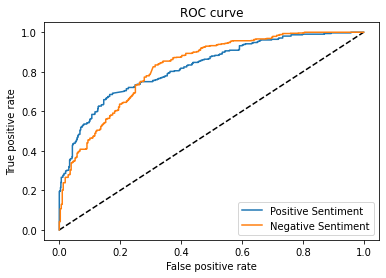

In [126]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
# plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [127]:
from sklearn.metrics import f1_score
predicted_labels = pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.802791
F1-macro = 0.719008


In [128]:
from sklearn.metrics import classification_report
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.810056  0.945241  0.872443       767
    positive   0.766667  0.448052  0.565574       308

    accuracy                       0.802791      1075
   macro avg   0.788361  0.696647  0.719008      1075
weighted avg   0.797624  0.802791  0.784521      1075



# ~ gCV + LogRegr ~

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')
gcv_lr = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3], 'penalty': ['l1', 'l2', 'elasticnet']},
    scoring=f1_macro_scorer,
    n_jobs=-1,
)

In [130]:
gcv_lr_tp1 = time.time()
gcv_lr.fit(X_transformed_and_selected, labels)
gcv_lr_tp2 = time.time()
print(f'Time needed for search: {gcv_lr_tp2 - gcv_lr_tp1}s')

Time needed for search: 2.100088357925415s


In [131]:
gcv_lr_bp = gcv_lr.best_params_
print(gcv_lr_bp)

{'C': 100.0, 'penalty': 'l2'}


In [132]:
bcls_gcv_lr = LogisticRegression(
                                 solver='liblinear', 
                                 verbose=True, 
                                 C=gcv_lr_bp['C'], 
                                 penalty=gcv_lr_bp['penalty']
                                )

In [133]:
gcv_lr_tp3 = time.time()
bcls_gcv_lr.fit(X_transformed_and_selected, labels)
gcv_lr_tp4 = time.time()
print(f'Time needed for computation: {gcv_lr_tp4 - gcv_lr_tp3}s')

[LibLinear]Time needed for computation: 0.01811528205871582s


In [134]:
best_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_gcv_lr)
    ]
)

In [135]:
probabilities = best_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

# y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
# y_score_neutrals = probabilities[:, classes_list.index('neutral')]
# fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

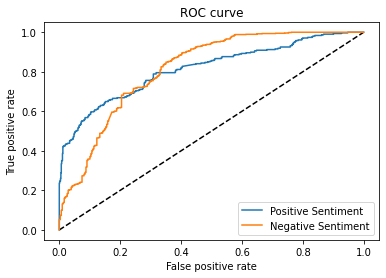

In [136]:
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
# plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [137]:
predicted_labels = best_pipeline_for_se.predict(texts_for_testing)
fmi_gcv_lr = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_gcv_lr = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_gcv_lr))
print('F1-macro = {0:.6f}'.format(fma_gcv_lr))

F1-micro = 0.814884
F1-macro = 0.753636


In [138]:
clsrep_gcv_lr = classification_report(labels_for_testing, predicted_labels, digits=6)

In [139]:
print(clsrep_gcv_lr)

              precision    recall  f1-score   support

    negative   0.836493  0.920469  0.876474       767
    positive   0.735931  0.551948  0.630798       308

    accuracy                       0.814884      1075
   macro avg   0.786212  0.736209  0.753636      1075
weighted avg   0.807681  0.814884  0.806085      1075



# ~ rCV + LogReg ~

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
rcv_lr = RandomizedSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_distributions={
                'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3], 
                'penalty': ['l1', 'l2', 'elasticnet']
                },
    n_iter = 100,
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [142]:
rcv_lr_tp1 = time.time()
rcv_lr.fit(X_transformed_and_selected, labels)
rcv_lr_tp2 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [143]:
print(f'Time needed for search: {rcv_lr_tp2 - rcv_lr_tp1}s')
rcv_lr_bp = rcv_lr.best_params_
print(rcv_lr_bp)

Time needed for search: 0.9442722797393799s
{'penalty': 'l2', 'C': 100.0}


In [144]:
bcls_rcv_lr = LogisticRegression(
                                 solver='liblinear', 
                                 verbose=True, 
                                 C=rcv_lr_bp['C'], 
                                 penalty=rcv_lr_bp['penalty']
                                 )
rcv_lr_tp3 = time.time()
bcls_rcv_lr.fit(X_transformed_and_selected, labels)
rcv_lr_tp4 = time.time()
print('Time needed for computations: ', rcv_lr_tp4 - rcv_lr_tp3)

[LibLinear]Time needed for computations:  0.015109539031982422


In [145]:
rand_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_rcv_lr)
    ]
)

In [146]:
probabilities = rand_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

# y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
# y_score_neutrals = probabilities[:, classes_list.index('neutral')]
# fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

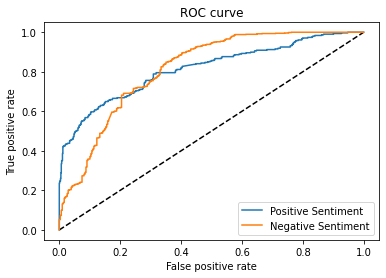

In [147]:
plt.figure(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
# plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [148]:
predicted_labels = rand_pipeline_for_se.predict(texts_for_testing)
fmi_rcv_lr = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_rcv_lr = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_rcv_lr))
print('F1-macro = {0:.6f}'.format(fma_rcv_lr))

F1-micro = 0.814884
F1-macro = 0.753636


In [149]:
clsrep_rcv_lr = classification_report(labels_for_testing, predicted_labels, digits=6)
print(clsrep_rcv_lr)

              precision    recall  f1-score   support

    negative   0.836493  0.920469  0.876474       767
    positive   0.735931  0.551948  0.630798       308

    accuracy                       0.814884      1075
   macro avg   0.786212  0.736209  0.753636      1075
weighted avg   0.807681  0.814884  0.806085      1075



# ~ gCV + SGDC ~

In [150]:
from sklearn.linear_model import SGDClassifier

In [151]:
gcv_sgdc = GridSearchCV(
    estimator=SGDClassifier(loss='log'),
    param_grid={
                'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1], 
                'penalty': ['l1', 'l2', 'elasticnet']
                },
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [152]:
gcv_sgdc_tp1 = time.time()
gcv_sgdc.fit(X_transformed_and_selected, labels)
gcv_sgdc_tp2 = time.time()

In [153]:
print(f'Time needed for search: {gcv_sgdc_tp2 - gcv_sgdc_tp1}s')
gcv_sgdc_bp = gcv_sgdc.best_params_
print(gcv_sgdc_bp)

Time needed for search: 0.732539176940918s
{'alpha': 0.0001, 'penalty': 'elasticnet'}


In [154]:
bcls_gcv_sgdc = SGDClassifier( 
                     loss='log',
                     penalty=gcv_sgdc_bp['penalty'],
                     alpha=gcv_sgdc_bp['alpha'],
                     max_iter=1000
                    )

In [155]:
gcv_sgdc_tp3 = time.time()
bcls_gcv_sgdc.fit(X_transformed_and_selected, labels)
gcv_sgdc_tp4 = time.time()

In [156]:
print(f'Time needed for computations: {gcv_sgdc_tp4 - gcv_sgdc_tp3}s')

Time needed for computations: 0.013571500778198242s


In [157]:
sgdc_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_gcv_sgdc)
    ]
)

In [158]:
probabilities = sgdc_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

# y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
# y_score_neutrals = probabilities[:, classes_list.index('neutral')]
# fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

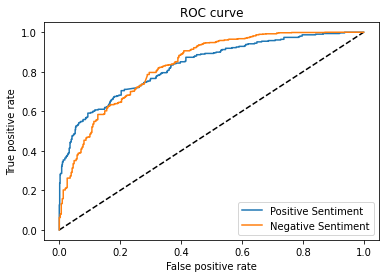

In [159]:
plt.figure(4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
# plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [160]:
predicted_labels = sgdc_pipeline_for_se.predict(texts_for_testing)
fmi_gcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_gcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_gcv_sgdc))
print('F1-macro = {0:.6f}'.format(fma_gcv_sgdc))

F1-micro = 0.816744
F1-macro = 0.755507


In [161]:
clsrep_gcv_sgdc = classification_report(labels_for_testing, predicted_labels, digits=6)
print(clsrep_gcv_sgdc)

              precision    recall  f1-score   support

    negative   0.836879  0.923077  0.877867       767
    positive   0.742358  0.551948  0.633147       308

    accuracy                       0.816744      1075
   macro avg   0.789619  0.737512  0.755507      1075
weighted avg   0.809798  0.816744  0.807752      1075



# ~ rCV + SGDClassifier ~

In [162]:
from sklearn.linear_model import SGDClassifier

In [163]:
rcv_sgdc = RandomizedSearchCV(
    estimator=SGDClassifier(loss='log'),
    param_distributions={
                'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1], 
                'penalty': ['l1', 'l2', 'elasticnet']
                },
    n_iter = 100,
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [164]:
rcv_sgdc_tp1 = time.time()
rcv_sgdc.fit(X_transformed_and_selected, labels)
rcv_sgdc_tp2 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [165]:
print(f'Time needed for search: {rcv_sgdc_tp2 - rcv_sgdc_tp1}s')
rcv_sgdc_bp = rcv_sgdc.best_params_
print(rcv_sgdc_bp)

Time needed for search: 0.7332327365875244s
{'penalty': 'elasticnet', 'alpha': 0.0001}


In [166]:
bcls_rcv_sgdc = SGDClassifier( 
                     loss='log',
                     penalty=rcv_sgdc_bp['penalty'],
                     alpha=rcv_sgdc_bp['alpha'],
                     max_iter=1000
                    )

In [167]:
rcv_sgdc_tp3 = time.time()
bcls_rcv_sgdc.fit(X_transformed_and_selected, labels)
rcv_sgdc_tp4 = time.time()

In [168]:
print(f'Time needed for computations: {rcv_sgdc_tp4 - rcv_sgdc_tp3}s')

Time needed for computations: 0.013298273086547852s


In [169]:
sgdc_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', bcls_rcv_sgdc)
    ]
)

In [170]:
probabilities = sgdc_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

# y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
# y_score_neutrals = probabilities[:, classes_list.index('neutral')]
# fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

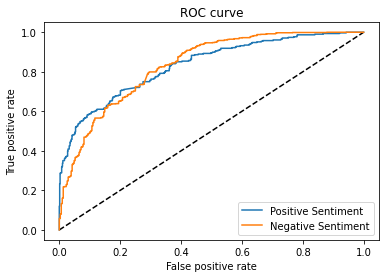

In [171]:
plt.figure(4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
# plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [172]:
predicted_labels = sgdc_pipeline_for_se.predict(texts_for_testing)
fmi_rcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='micro')
fma_rcv_sgdc = f1_score(labels_for_testing, predicted_labels, average='macro')
print('F1-micro = {0:.6f}'.format(fmi_rcv_sgdc))
print('F1-macro = {0:.6f}'.format(fma_rcv_sgdc))

F1-micro = 0.819535
F1-macro = 0.758327


In [173]:
clsrep_rcv_sgdc = classification_report(labels_for_testing, predicted_labels, digits=6)
print(clsrep_rcv_sgdc)

              precision    recall  f1-score   support

    negative   0.837456  0.926988  0.879950       767
    positive   0.752212  0.551948  0.636704       308

    accuracy                       0.819535      1075
   macro avg   0.794834  0.739468  0.758327      1075
weighted avg   0.813033  0.819535  0.810258      1075



# ~ Выводы ~

In [174]:
scheme = '--- {}\nSearch time: {}\nComputation time: {}\nF1-micro = {}\nF1-macro = {}\nReport:\n{}\n' 
print(scheme.format('gCV + LogReg', gcv_lr_tp2-gcv_lr_tp1, gcv_lr_tp4-gcv_lr_tp3, fmi_gcv_lr, fma_gcv_lr, clsrep_gcv_lr))
print(scheme.format('rCV + LogReg', rcv_lr_tp2-rcv_lr_tp1, rcv_lr_tp4-rcv_lr_tp3, fmi_rcv_lr, fma_rcv_lr, clsrep_rcv_lr))
print(scheme.format('gCV + SGDC', gcv_sgdc_tp2-gcv_sgdc_tp1, gcv_sgdc_tp4-gcv_sgdc_tp3, fmi_gcv_sgdc, fma_gcv_sgdc, clsrep_gcv_sgdc))
print(scheme.format('rCV + SGDC', rcv_sgdc_tp2-rcv_sgdc_tp1, rcv_sgdc_tp4-rcv_sgdc_tp3, fmi_rcv_sgdc, fma_rcv_sgdc, clsrep_rcv_sgdc))

--- gCV + LogReg
Search time: 2.100088357925415
Computation time: 0.01811528205871582
F1-micro = 0.8148837209302325
F1-macro = 0.7536360066288239
Report:
              precision    recall  f1-score   support

    negative   0.836493  0.920469  0.876474       767
    positive   0.735931  0.551948  0.630798       308

    accuracy                       0.814884      1075
   macro avg   0.786212  0.736209  0.753636      1075
weighted avg   0.807681  0.814884  0.806085      1075


--- rCV + LogReg
Search time: 0.9442722797393799
Computation time: 0.015109539031982422
F1-micro = 0.8148837209302325
F1-macro = 0.7536360066288239
Report:
              precision    recall  f1-score   support

    negative   0.836493  0.920469  0.876474       767
    positive   0.735931  0.551948  0.630798       308

    accuracy                       0.814884      1075
   macro avg   0.786212  0.736209  0.753636      1075
weighted avg   0.807681  0.814884  0.806085      1075


--- gCV + SGDC
Search time: 0.7325